## Produccion hidrocarbiros primer trimestre 2024 Argentina

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# data
d2024 = pd.read_csv('data\produccin-de-pozos-de-gas-y-petrleo-2024.csv', low_memory=False)

### Exploracion de datos

In [4]:
pd.set_option('display.max_columns', None)
d2024.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,Z001,2024,1,145622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.DJ.x-2,PROS,2402.0,punta rosada,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
1,Z001,2024,1,145624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.GR.x-2,FIMP,2507.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
2,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.RN.-2,FIMP,1903.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
3,Z001,2024,1,145625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.GR.x-5,FIMP,2707.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
4,Z001,2024,1,145623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plunger Lift,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.G.x-1,FIMP,2500.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31


In [5]:
d2024.isna().sum()

idempresa                      0
anio                           0
mes                            0
idpozo                         0
prod_pet                       0
prod_gas                       0
prod_agua                      0
iny_agua                       0
iny_gas                        0
iny_co2                        0
iny_otro                       0
tef                            0
vida_util                 237292
tipoextraccion                10
tipoestado                    10
tipopozo                      10
observaciones             227177
fechaingreso                   0
rectificado                    0
habilitado                     0
idusuario                      0
empresa                        0
sigla                          0
formprod                    8040
profundidad                    0
formacion                   8379
idareapermisoconcesion         0
areapermisoconcesion           0
idareayacimiento               0
areayacimiento                 0
cuenca    

In [6]:
d2024.shape

(242437, 38)

### Limpieza de datos

In [7]:
# Limpieza de df
useful_columns = d2024[['anio','mes','idpozo','prod_pet','prod_gas','prod_agua','iny_agua','iny_gas','iny_co2','iny_otro','tipoextraccion','tipoestado','tipopozo','empresa','profundidad','cuenca','provincia','fecha_data']]
my_dataframe = useful_columns.dropna()
# Sub df para Mes, tipoEstado 
unique_mes = my_dataframe['mes'].unique()
sub_mes = {}
for n in unique_mes:
    sub_mes[n] = my_dataframe.loc[my_dataframe['mes'] == n]

In [8]:
# Seteo de meses
mes1 = sub_mes[1] 
mes2 = sub_mes[2]
mes3 = sub_mes[3]

#### desglose en meses

##### enero

In [9]:
# Desglose mes de enero 
# Activos
pozos_activos = pd.concat([mes1.loc[mes1['tipoestado']=='Extracción Efectiva'], mes1.loc[mes1['tipoestado']=='En Inyección Efectiva']], axis=0, ignore_index=True) 
pozos_reserva = pd.concat([mes1.loc[mes1['tipoestado']=='En Reserva de Gas'], mes1.loc[mes1['tipoestado']=='En Reserva para Recup. Sec./Asist.']], axis=0, ignore_index=True)
pozos_en_estudio = mes1.loc[mes1['tipoestado']=='En Estudio']

# Mantenimiento
pozos_en_mantenimiento = pd.concat([mes1.loc[mes1['tipoestado']=='Mantenimiento de Presión'],mes1.loc[mes1['tipoestado']=='En Reparación']], axis=0, ignore_index=True)

# Detenidos
pozos_parados = pd.concat([mes1.loc[mes1['tipoestado']=='Abandono Temporario'],
 mes1.loc[mes1['tipoestado']=='Parado Alta Relación Agua/Petróleo'],
 mes1.loc[mes1['tipoestado']=='Parado Alta Relación Gas/Petróleo'],
 mes1.loc[mes1['tipoestado']=='Parado Transitoriamente'],
 mes1.loc[mes1['tipoestado']=='Otras Situación Activo'],
 mes1.loc[mes1['tipoestado']=='Otras Situación Inactivo']], axis=0, ignore_index=True) 

# Abandonados o por abandonar
pozos_abandonados = mes1.loc[mes1['tipoestado']=='Abandonado']
pozos_a_abandonar = mes1.loc[mes1['tipoestado']=='A Abandonar']


##### febrero

In [10]:
# Desglose mes de febrero 
# Activos
pozos_activos = pd.concat([mes2.loc[mes2['tipoestado']=='Extracción Efectiva'], mes2.loc[mes2['tipoestado']=='En Inyección Efectiva']], axis=0, ignore_index=True) 
pozos_reserva = pd.concat([mes2.loc[mes2['tipoestado']=='En Reserva de Gas'], mes2.loc[mes2['tipoestado']=='En Reserva para Recup. Sec./Asist.']], axis=0, ignore_index=True)
pozos_en_estudio = mes2.loc[mes2['tipoestado']=='En Estudio']

# Mantenimiento
pozos_en_mantenimiento = pd.concat([mes2.loc[mes2['tipoestado']=='Mantenimiento de Presión'],mes2.loc[mes2['tipoestado']=='En Reparación']], axis=0, ignore_index=True)

# Detenidos
pozos_parados = pd.concat([mes2.loc[mes2['tipoestado']=='Abandono Temporario'],
 mes2.loc[mes2['tipoestado']=='Parado Alta Relación Agua/Petróleo'],
 mes2.loc[mes2['tipoestado']=='Parado Alta Relación Gas/Petróleo'],
 mes2.loc[mes2['tipoestado']=='Parado Transitoriamente'],
 mes2.loc[mes2['tipoestado']=='Otras Situación Activo'],
 mes2.loc[mes2['tipoestado']=='Otras Situación Inactivo']], axis=0, ignore_index=True) 

# Abandonados o por abandonar
pozos_abandonados = mes2.loc[mes2['tipoestado']=='Abandonado']
pozos_a_abandonar = mes2.loc[mes2['tipoestado']=='A Abandonar']


##### Marzo

In [11]:
# Desglose mes de marzo 
# Activos
pozos_activos = pd.concat([mes3.loc[mes3['tipoestado']=='Extracción Efectiva'], mes3.loc[mes3['tipoestado']=='En Inyección Efectiva']], axis=0, ignore_index=True) 
pozos_reserva = pd.concat([mes3.loc[mes3['tipoestado']=='En Reserva de Gas'], mes3.loc[mes3['tipoestado']=='En Reserva para Recup. Sec./Asist.']], axis=0, ignore_index=True)
pozos_en_estudio = mes3.loc[mes3['tipoestado']=='En Estudio']

# Mantenimiento
pozos_en_mantenimiento = pd.concat([mes3.loc[mes3['tipoestado']=='Mantenimiento de Presión'],mes3.loc[mes3['tipoestado']=='En Reparación']], axis=0, ignore_index=True)

# Detenidos
pozos_parados = pd.concat([mes3.loc[mes3['tipoestado']=='Abandono Temporario'],
 mes3.loc[mes3['tipoestado']=='Parado Alta Relación Agua/Petróleo'],
 mes3.loc[mes3['tipoestado']=='Parado Alta Relación Gas/Petróleo'],
 mes3.loc[mes3['tipoestado']=='Parado Transitoriamente'],
 mes3.loc[mes3['tipoestado']=='Otras Situación Activo'],
 mes3.loc[mes3['tipoestado']=='Otras Situación Inactivo']], axis=0, ignore_index=True) 

# Abandonados o por abandonar
pozos_abandonados = mes3.loc[mes3['tipoestado']=='Abandonado']
pozos_a_abandonar = mes3.loc[mes3['tipoestado']=='A Abandonar']


### Analisis

##### Cantidad de pozos por provicia

In [12]:
# IN WORKING 
x=mes3['provincia'].unique()
y=mes3['provincia'].value_counts()
# Necesito un grafico de barras acumuladas

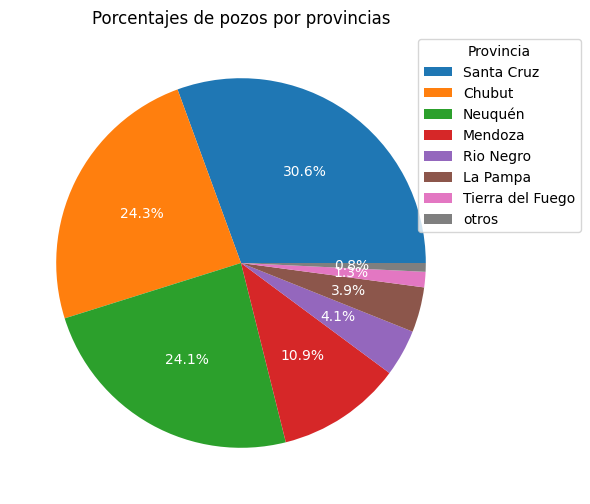

#### Total de pozos no abandonados por provincia

In [ ]:
# Aqui va un cuadro detallando cada uno

In [ ]:
# Aqui va un cuadro de las profundidades medias de cada provincia

***Pozos activos*** Por provincia

In [ ]:
#Cantidad pozos activos por provincia 
from matplotlib.ticker import NullFormatter
# data
x = pozos_activos['provincia'].unique()
y = pozos_activos['provincia'].value_counts()

# Creacion grafico
fig, ax = plt.subplots(figsize=(10,4))
bars = ax.bar(x,y, color='skyblue')
# Grafico logarítmico 
ax.set_yscale('log')
ax.yaxis.set_major_formatter(NullFormatter())
ax.grid()
# agregado del valor entero de cada provincia
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval,int(yval))
# Arreglos
plt.xticks(rotation=45)
plt.title('Pozos activos por provincia')
plt.show()

#### Porcentajes de pozos no abandonados por provincia

In [ ]:
# aqui va un grafico de torta con los porcentajes de cada provincia bien desglosado

*Mes de marzo*

In [ ]:
# Esto no es final, solo una aproximacion
# FIltrado de pozos abandonados y seleccionado el mes de marzo
pozos_totales = mes3.loc[mes3['tipoestado']!='Abandonado']
# Cuanta por provincia
data = pozos_totales['provincia'].value_counts()
# Tomamos el porcentaje
percentages = (data / data.sum())*100
# Filtramos los resultados menores a 1 y los agrupamos en 'otros'
filtered_data = percentages[percentages >= 1]
filtered_data['otros'] = percentages[percentages < 1].sum()

# Creamos el grafico
fig, ax = plt.subplots(figsize=(10,6))
wedges, labels, autotexts = ax.pie(filtered_data, autopct='%1.1f%%')
labels = filtered_data.index
ax.legend(wedges, labels, title='Provincia', loc="upper right", bbox_to_anchor=(1,0,0.25,1))

plt.title('Porcentajes de pozos por provincias')
plt.setp(autotexts, size=10, color="white")
plt.show()


#### Produccion petroleo, gas, agua por provincia

In [15]:
# Aqui va un grafico de barras acumuladas con cada provincia y produccion 

Inyeccion de agua, co2, gas por provincia

Empresas con mayor produccion

Cuenca con mayor produccion

Extraccion mas frecuente por cuenca